# Анализ бизнес-показателей Яндекс.Афиши

# Введение

Перед нами представлена информация о дейстиях пользователей и рекламных бюджетах Яндекс.Афиши за период с июня 2017 по конец мая 2018 года.
Всего имеется три таблицы: 
- лог сервера с данными о посещениях сайта Яндекс.Афиши (информация о дате и времени входа и выхода каждого пользователя за период, устройстке, скоторого произошел вход и об источнике его входа),
- выгрузка всех заказов за этот период (данные по выручке, которую принес каждый пользователь, сделавший заказ с указанием даты и времени покупки),
- статистика рекламных расходов (по датам, с указанием идентификатора рекламного источника и затрат).

Цель исследования: определить, какие рекламные источники и платформы являются наиболее эффективными с точки зрения принесения максимальной прибыли. Для этого относительно каждой платформы и рекламного источника предстоит решить следующие задачи:
- изучить, как люди пользуются продуктом,
- понять, когда они начинают покупать и сколько денег приносит каждый клиент,
- выяснить, когда клиент окупается.

# Оглавление 
1. [Изучение данных и предобработка](#step1)
    1. [Общая информация о данных](#step1.1)
    2. [Предобработка данных](#step1.2)
2. [Анализ данных](#step2)
    1. [Продукт](#step2.1)
    2. [Продажи](#step2.2)
    3. [Маркетинг](#step2.3) 
3. [Общий вывод](#step3)

# Раздел 1. Изучение данных и предобработка <a name="step1"></a>

## Раздел 1.1. Общая информация о данных  <a name="step1.1"></a>

У нас есть три таблицы с данными, загрузим их и предварительно изучим информацию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits['Device'].unique()

array(['touch', 'desktop'], dtype=object)

In [6]:
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [8]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


### Вывод

У нас есть данные о 359 400 транзакциях посетителей на сайте Яндекс.Афиши, с указанием типа устройства (desktop или touch - видимо, имеется в виду десктопная или мобильная версия сайта) и одного из 10 рекламных источников, а также сведения об их покупках (50 415 сделок за период) и рекламных бюджетах по источникам (2 542 строки с расходами).
При первом взгляде на данные видим следующее.
1. Все наши таблицы "полные", без пропущенных значений, требующих обработки - предполагаем, что данные собраны корректно.
2. Неудобно названы столбцы - где-то с большой буквы, где-то с пробелами, не везде одни и те же названия аналогичных столбцов совпадают - нужно будет унифицировать.
3. Типы данных: числовые и текстовые данные имеют корректные типы данных, время везде нужно будет перевести в корректный тип + для анализа нам понадобится знать не только полную дату совершения действия, но и отдельно год, месяц, неделю, день.


## Раздел 1.2. Предобработка данных  <a name="step1.2"></a>

Переименуем столбцы во всех трех таблицах.

In [10]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [11]:
orders.columns = ['buy_ts', 'revenue', 'uid']

In [12]:
costs.columns = ['source_id', 'ad_date', 'costs']

Преобразуем тип временных данных, чтобы можно было дальше работать с ними.

In [13]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['ad_date'] = pd.to_datetime(costs['ad_date'])

Выделим в каждой таблице отдельные столбцы с датами, неделями, месяцами.

In [14]:
visits['end_date'] = visits['end_ts'].astype('datetime64[D]')
visits['end_week'] = visits['end_ts'].astype('datetime64[W]')
visits['end_month'] = visits['end_ts'].astype('datetime64[M]')

In [15]:
visits['start_date'] = visits['start_ts'].astype('datetime64[D]')
visits['start_week'] = visits['start_ts'].astype('datetime64[W]')
visits['start_month'] = visits['start_ts'].astype('datetime64[M]')

In [16]:
orders['buy_date'] = orders['buy_ts'].astype('datetime64[D]')
orders['buy_week'] = orders['buy_ts'].astype('datetime64[W]')
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')

In [17]:
costs['ad_week'] = costs['ad_date'].astype('datetime64[W]')
costs['ad_month'] = costs['ad_date'].astype('datetime64[M]')

Посмотрим на получившиеся таблицы.

In [18]:
visits.sample(5)

,device,end_ts,source_id,start_ts,uid,end_date,end_week,end_month,start_date,start_week,start_month
200036,desktop,2017-10-05 09:09:00,1,2017-10-05 08:28:00,16514335068409831472,2017-10-05,2017-10-05,2017-10-01,2017-10-05,2017-10-05,2017-10-01
34716,desktop,2017-07-29 18:41:00,4,2017-07-29 18:37:00,2409519157938595656,2017-07-29,2017-07-27,2017-07-01,2017-07-29,2017-07-27,2017-07-01
205731,desktop,2018-03-05 11:55:00,4,2018-03-05 11:40:00,4543455955320724260,2018-03-05,2018-03-01,2018-03-01,2018-03-05,2018-03-01,2018-03-01
108420,touch,2017-09-10 20:32:00,4,2017-09-10 20:00:00,3406583949946354507,2017-09-10,2017-09-07,2017-09-01,2017-09-10,2017-09-07,2017-09-01
75388,touch,2017-10-09 22:33:00,5,2017-10-09 22:23:00,11743394653601448744,2017-10-09,2017-10-05,2017-10-01,2017-10-09,2017-10-05,2017-10-01


In [19]:
orders.sample(5)

,buy_ts,revenue,uid,buy_date,buy_week,buy_month
2465,2017-07-03 11:56:00,1.83,13888745432979765063,2017-07-03,2017-06-29,2017-07-01
22144,2017-12-05 18:12:00,14.67,10423526194107548532,2017-12-05,2017-11-30,2017-12-01
503,2017-06-06 00:22:00,0.30,6088114191995640973,2017-06-06,2017-06-01,2017-06-01
27928,2018-01-03 20:22:00,1.47,12799943308169692330,2018-01-03,2017-12-28,2018-01-01
9419,2017-09-28 10:50:00,4.28,1687793962578569946,2017-09-28,2017-09-28,2017-09-01


In [20]:
costs.sample(5)

,source_id,ad_date,costs,ad_week,ad_month
753,3,2017-06-28,200.73,2017-06-22,2017-06-01
254,1,2018-02-10,66.70,2018-02-08,2018-02-01
1304,4,2018-01-02,281.71,2017-12-28,2018-01-01
837,3,2017-09-20,330.87,2017-09-14,2017-09-01
1542,5,2017-08-30,97.57,2017-08-24,2017-08-01


### Вывод

Сделали некоторые преобразования над таблицами: поменяли имена столбцов, изменили тип нужных данных, добавили необходимые столбцы с обозначениями дня, недели, месяца совершения действия.
Получили данные, готовые к дальнейшему анализу.


# Раздел 2. Анализ данных  <a name="step2"></a>

## Раздел 2.1. Продукт  <a name="step2.1"></a>

В рамках анализа продукта предстоит найти ответы на следующие вопросы:
- Сколько людей пользуются сайтом Яндекс.Афиша в день, неделю, месяц?
- Сколько сессий в день они совершают?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

Каждый вопрос будем рассматривать с точки зрения использования разных устройств и перехода с разных рекламных источников.

<b> Для начала посчитаем посетителей сайта по дням, неделям и месяцам. </b>

In [21]:
visits_per_day = visits.groupby('start_date')['uid'].nunique().reset_index()

In [22]:
visits_per_day

,start_date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
...,...,...
359,2018-05-27,620
360,2018-05-28,1039
361,2018-05-29,948
362,2018-05-30,1289


Данные в нашем датасете представлены ровно за год, то строк в полученной таблице 364! Значится потерялся 1 день, в который, вероятно, было сделано 0 визитов. Создадим новую таблицу, где будут присутствовать все дни года.

In [23]:
days_of_year = pd.date_range(pd.to_datetime('2017-06-01').date(), pd.to_datetime('2018-06-01').date()-timedelta(days=1),freq='d')

In [24]:
days_of_year

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-03', '2017-06-04',
               '2017-06-05', '2017-06-06', '2017-06-07', '2017-06-08',
               '2017-06-09', '2017-06-10',
               ...
               '2018-05-22', '2018-05-23', '2018-05-24', '2018-05-25',
               '2018-05-26', '2018-05-27', '2018-05-28', '2018-05-29',
               '2018-05-30', '2018-05-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [25]:
visits_per_day_of_year = pd.DataFrame()

In [26]:
visits_per_day_of_year['start_date'] = days_of_year

In [27]:
visits_per_day_of_year

,start_date
0,2017-06-01
1,2017-06-02
2,2017-06-03
3,2017-06-04
4,2017-06-05
...,...
360,2018-05-27
361,2018-05-28
362,2018-05-29
363,2018-05-30


In [28]:
visits_per_day_of_year = visits_per_day_of_year.merge(visits_per_day, how='left', on='start_date')

In [29]:
visits_per_day_of_year

,start_date,uid
0,2017-06-01,605.0
1,2017-06-02,608.0
2,2017-06-03,445.0
3,2017-06-04,476.0
4,2017-06-05,820.0
...,...,...
360,2018-05-27,620.0
361,2018-05-28,1039.0
362,2018-05-29,948.0
363,2018-05-30,1289.0


In [31]:
visits_per_day_of_year = visits_per_day_of_year.fillna('0')
visits_per_day_of_year['uid'] = visits_per_day_of_year['uid'].astype('int')

In [32]:
visits_per_day_of_year

,start_date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
...,...,...
360,2018-05-27,620
361,2018-05-28,1039
362,2018-05-29,948
363,2018-05-30,1289


Text(0, 0.5, 'Уникальных посетителей')

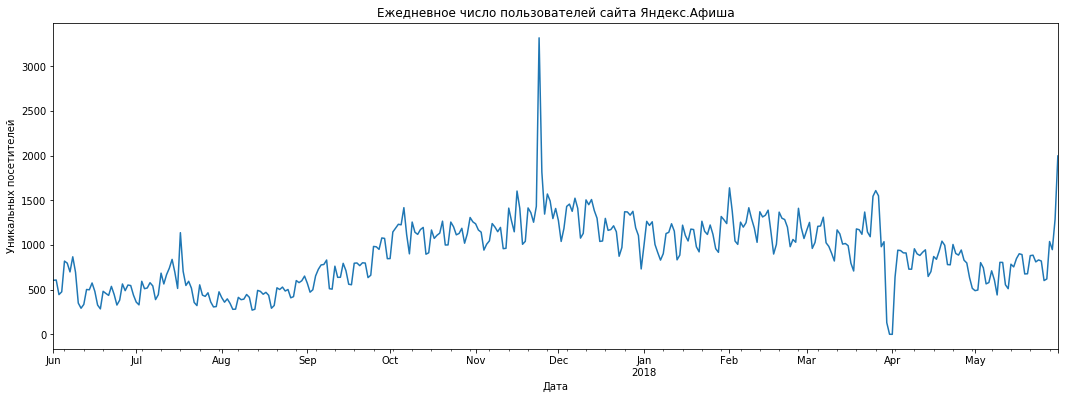

In [33]:
visits_per_day_plot = visits_per_day_of_year.plot('start_date', 'uid', figsize = (18, 6), title='Ежедневное число пользователей сайта Яндекс.Афиша', legend=False)
visits_per_day_plot.set_xlabel('Дата')
visits_per_day_plot.set_ylabel('Уникальных посетителей')

In [34]:
visits_per_day_of_year[visits_per_day_of_year['uid'] == visits_per_day_of_year['uid'].max()]

,start_date,uid
176,2017-11-24,3319


In [35]:
visits_per_day_of_year[visits_per_day_of_year['uid'] == visits_per_day_of_year['uid'].min()]

,start_date,uid
304,2018-04-01,0


Видно, что посещение сайта в течение годового периода было крайне неравномерным: видны периоды спадов и падений, а также странные аномалии: огромный всплеск 24 ноября с 3319 посетителями (скорее всего, была объявлена распродажа, судя по периоду - Черная пятница, с большими скидками)) и провал до 0 1 апреля (видимо, что-то случилось с сайтом: поломка, перенос на новый сервер или какие-то другие проблемы, из-за чего ни один пользователь не смог зайти на сайт).

In [36]:
visits.groupby('start_date')['uid'].nunique().mean()

907.9917582417582

In [37]:
visits.groupby(['device', 'start_date'])['uid'].nunique().reset_index().pivot_table(index='device',values='uid',aggfunc='mean')

,uid
device,
desktop,659.244505
touch,252.873278


При этом в среднем в день со всех устройств на сайт заходит 908 человек, но по девайсам они распределены неравномерно: основные посетители Яндекс.Афиши заходят с десктопа (почти 75%), остальные - с мобильной версии. Это весьма любопытно, т.к. в конце 2017 года уже была определена тенденция на переход пользователей в мобильные устройства, а их процент пока довольно мал. Надо развивать и адаптирвоать моб. версию сайта, чтобы пользователям было удобнее заходить на Афишу с телефона (иначе они найдут альтернативный источник получения информации о мероприятиях).

In [38]:
visits_per_day_by_source = visits.groupby(['source_id', 'start_date'])['uid'].nunique().reset_index().pivot_table(index='source_id',values='uid',aggfunc='mean')

In [39]:
visits_per_day_by_source

,uid
source_id,
1,80.557692
2,120.707989
3,232.865014
4,275.454545
5,175.622590
6,1.000000
7,1.058824
9,36.110193
10,26.033058


Text(0, 0.5, 'Уникальных посетителей')

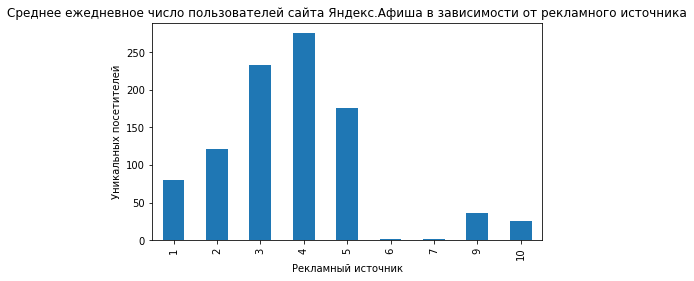

In [40]:
visits_per_day_by_source_plot = visits_per_day_by_source.plot(figsize = (7, 4), kind='bar', title='Среднее ежедневное число пользователей сайта Яндекс.Афиша в зависимости от рекламного источника', legend=False)
visits_per_day_by_source_plot.set_xlabel('Рекламный источник')
visits_per_day_by_source_plot.set_ylabel('Уникальных посетителей')

Разные рекламные каналы привлекли разное число пользователей: в среднем за день больше всего пришло пользователей с источников 3 и 4: более 200 человек в среденм в день. Из истчоника 6 и 7 пришло совсем мало людей - скорее всего, это были какие-то кратковременные рекламные кампании, не показавшие свою эффективность.

Теперь изучим понедельную динамику.

In [41]:
visits_per_week = visits.groupby('start_week')['uid'].nunique().reset_index()

In [42]:
visits_per_week.head(10)

,start_week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055
5,2017-07-06,3563
6,2017-07-13,4790
7,2017-07-20,2978
8,2017-07-27,2505
9,2017-08-03,2343


Text(0, 0.5, 'Уникальных посетителей')

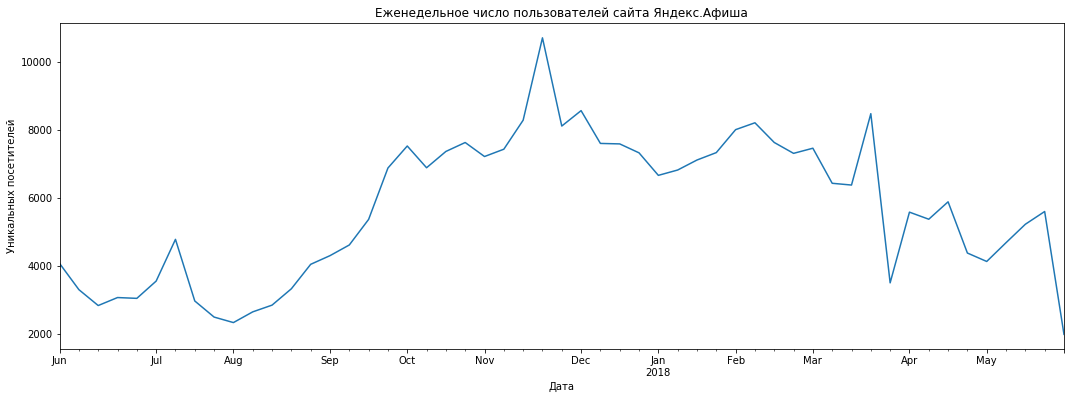

In [43]:
visits_per_week_plot = visits_per_week.plot('start_week', 'uid', figsize = (18, 6), title='Еженедельное число пользователей сайта Яндекс.Афиша', legend=False)
visits_per_week_plot.set_xlabel('Дата')
visits_per_week_plot.set_ylabel('Уникальных посетителей')

Еженедельная динамика более ярко показывает сезонность предоставляемых сервисом Яндекс.Афиша услуг. Так, летом спрос на мероприятия падает: их в целом становится меньше и люди больше предпочитают активночти на открытом воздухе, плюс многие проводят время на дачах или в отпусках.
Помимо явного пика в неделю Черной пятницы активнами являются и недели вокруг него: примерно с начала октября и практически до середины весны (с некоторым спадом в период новогодних праздников - видимо, опять же по причине отъездов). Неожиданное падение в конце марта хорошо видно и на понедельном графике - интересно, что этому предшествует заментный пик посетителей.

Среднее число пользователей по неделям и месяцам в зависимости от рекламного источника и используемого девайса в целом будет показывать ту же динамику и соотношение, что и по среднедневным данным, поэтому рассматривать отдельно их не будем.

Помесячная динамика будет выглядеть следующим образом.

In [44]:
visits_per_month = visits.groupby('start_month')['uid'].nunique().reset_index()

In [45]:
visits_per_month

,start_month,uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692
5,2017-11-01,32797
6,2017-12-01,31557
7,2018-01-01,28716
8,2018-02-01,28749
9,2018-03-01,27473


Text(0, 0.5, 'Уникальных посетителей')

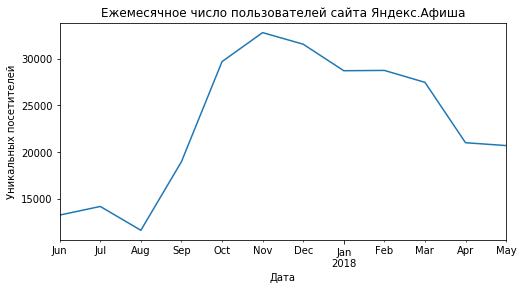

In [46]:
visits_per_month_plot = visits_per_month.plot('start_month', 'uid', figsize = (8, 4), title='Ежемесячное число пользователей сайта Яндекс.Афиша', legend=False)
visits_per_month_plot.set_xlabel('Дата')
visits_per_month_plot.set_ylabel('Уникальных посетителей')

Здесь видны практически те же тенденции, что и на понедельном графике: высокая активность с октября по март и заметное падение в летние месяцы.

<b> Теперь проанализируем, сколько сессий в день совершают пользователи Яндекс.Афиши. </b>

In [47]:
sessions_per_day = visits.groupby('start_date')['uid'].count().reset_index()

In [48]:
sessions_per_day

,start_date,uid
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893
...,...,...
359,2018-05-27,672
360,2018-05-28,1156
361,2018-05-29,1035
362,2018-05-30,1410


In [49]:
sessions_per_day_of_year = pd.DataFrame()
sessions_per_day_of_year['start_date'] = days_of_year
sessions_per_day_of_year = sessions_per_day_of_year.merge(visits_per_day, how='left', on='start_date')
sessions_per_day_of_year['for_ticks'] = sessions_per_day_of_year.apply(lambda row: row['start_date'] if row['start_date'].day == 1 else ' ', axis='columns')
sessions_per_day_of_year = sessions_per_day_of_year.fillna('0')
sessions_per_day_of_year['uid'] = sessions_per_day_of_year['uid'].astype('int')

In [50]:
sessions_per_day_of_year

,start_date,uid,for_ticks
0,2017-06-01,605,2017-06-01 00:00:00
1,2017-06-02,608,
2,2017-06-03,445,
3,2017-06-04,476,
4,2017-06-05,820,
...,...,...,...
360,2018-05-27,620,
361,2018-05-28,1039,
362,2018-05-29,948,
363,2018-05-30,1289,


Text(0, 0.5, 'Число сессий')

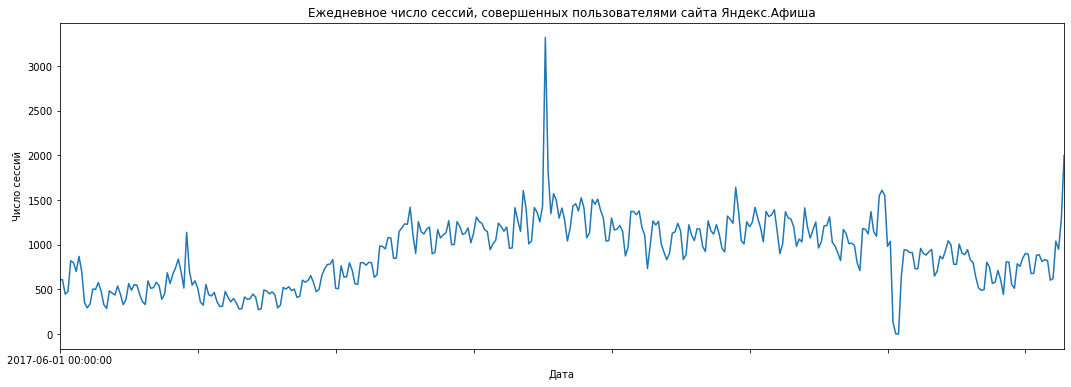

In [51]:
sessions_per_day_plot = sessions_per_day_of_year.plot('for_ticks', 'uid', figsize = (18, 6), title='Ежедневное число сессий, совершенных пользователями сайта Яндекс.Афиша', legend=False)
sessions_per_day_plot.set_xlabel('Дата')
sessions_per_day_plot.set_ylabel('Число сессий')

График ежедневного числа сессий мало отличается от графика ежедневного числа посетителей, заходящих на сайт. Здесь, помимо общих трендов, хорошо видны еженедельные колебания: спады к выходным и рост в начале недели.

<b> Следующим пунктом посчитаем, сколько длится в среднем одна сессия. </b>

Здесь нам будет интересно посмотреть на разбивку по девайсам, т.к. время в них может оказаться не одинаковым.


In [52]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [53]:
visits.head(5)

,device,end_ts,source_id,start_ts,uid,end_date,end_week,end_month,start_date,start_week,start_month,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-12-20,2017-12-14,2017-12-01,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-02-19,2018-02-15,2018-02-01,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-05-20,2018-05-17,2018-05-01,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-12-27,2017-12-21,2017-12-01,0


In [54]:
visits['session_duration'].mean()

643.506488592098

In [55]:
visits.groupby('device')['session_duration'].mean().reset_index()

,device,session_duration
0,desktop,703.946977
1,touch,479.619407


Посмотрим на гистограмму распределения показателей, чтобы понять, является ли среднее показатаельной метрикой для определения длительности сессии.

In [56]:
visits_desktop = visits[visits['device'] == "desktop"]
visits_touch = visits[visits['device'] == "touch"]

(0, 250000)

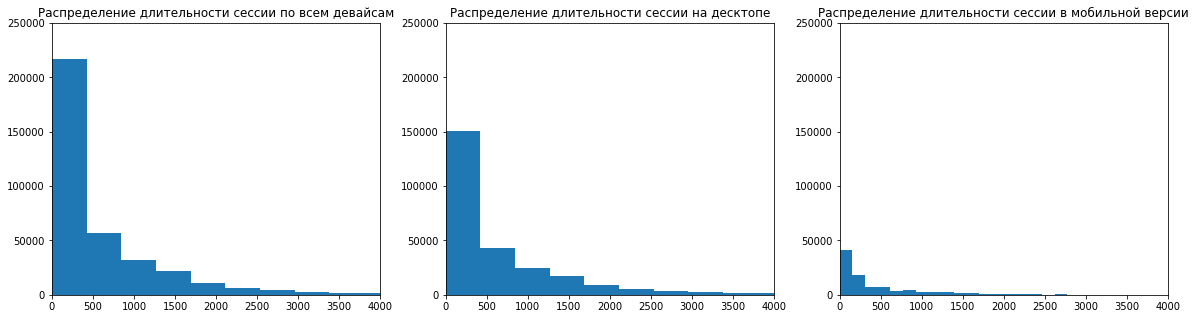

In [57]:
fig, (total_session, desktop_session, touch_session) = plt.subplots(1, 3, figsize = (20,5))
                                          
total_session.hist(visits['session_duration'], bins = 200)
total_session.set_title('Распределение длительности сессии по всем девайсам')
total_session.set_xlim(0, 4000)
total_session.set_ylim(0, 250000)
desktop_session.hist(visits_desktop['session_duration'], bins = 200)
desktop_session.set_title('Распределение длительности сессии на десктопе')
desktop_session.set_xlim(0, 4000)
desktop_session.set_ylim(0, 250000)
touch_session.hist(visits_touch['session_duration'], bins = 200)
touch_session.set_title('Распределение длительности сессии в мобильной версии')
touch_session.set_xlim(0, 4000)
touch_session.set_ylim(0, 250000)

In [137]:
visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

Среднее время визита в целом по системе составляет 643 сек (больше 10 минут). При этом ожидаемо, время на устройствах различается, почти в 1,5 раза: почти 12 мин на десктопе и только 8 минут с мобильного телефона.

Однако гистограмма распределения времени показывает другую картинку: абсолютное большинство пользователей каждого устройства проводит на сайте Яндекс.Афиши от 0 до 500 сек - т.е. менее 8 минут. Пользователей мобильных устройств в принципе довольно мало и медианное время у них еще меньше - до 170 секунд. Явно имеют место какие-то проблемы с мобильной версией - пользователям может быть неудобно или некомфортно смотреть наш сайт с маленького экрана. 


Получившееся до этого среднее говорит лишь о том, что у нас имеется большой хвост пользователей, которые провели на сайте 2000 или даже 4000 секунд. Интересно посмотреть, кто эти люди, потратившие час времени на изучение одного сайта. Есть даже значение в 84480 секунд - скорее всего, в данные закралась ошибка, и нужно сообщить разаботчикам об этом.

<b> Наконец, изучим, как часто люди возвращаются на сайт Яндекс.Афиши. </b>

Для этого проведем когортный анализ и вычислим Retention Rate.

In [58]:
first_visit_date = visits.groupby('uid')['start_date'].min()
first_visit_date.name = 'first_visit_date'
visits = visits.join(first_visit_date, on='uid')

In [59]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['cohort_lifetime'] = visits['start_date'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype(int)

In [60]:
cohorts_total = visits.groupby(['first_visit_month','cohort_lifetime'])['uid'].nunique().reset_index()
initial_users_count_total = cohorts_total[cohorts_total['cohort_lifetime'] == 0][['first_visit_month','uid']]
initial_users_count_total = initial_users_count_total.rename(columns={'uid':'cohort_users'})
cohorts_total = cohorts_total.merge(initial_users_count_total,on='first_visit_month')
cohorts_total['retention'] = cohorts_total['uid']/cohorts_total['cohort_users']
retention_pivot_total = cohorts_total.query('cohort_lifetime > 0').pivot_table(index='first_visit_month', columns = 'cohort_lifetime', values='retention',aggfunc='sum')

In [61]:
retention_pivot_total

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,
2017-06-01,0.075948,0.053775,0.061392,0.068557,0.071423,0.061015,0.056716,0.054227,0.049702,0.041632,0.044121
2017-07-01,0.054642,0.053120,0.054490,0.060046,0.047412,0.044901,0.048935,0.037139,0.029072,0.026941,NaN
2017-08-01,0.076908,0.062862,0.062764,0.050093,0.043021,0.040369,0.035949,0.028386,0.025440,NaN,NaN
2017-09-01,0.081597,0.070342,0.049509,0.039392,0.040230,0.033345,0.024605,0.021971,NaN,NaN,NaN
2017-10-01,0.078608,0.052239,0.037764,0.038034,0.030027,0.021865,0.019787,NaN,NaN,NaN,NaN
2017-11-01,0.073877,0.044113,0.040847,0.032149,0.023965,0.020735,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.054377,0.041238,0.029009,0.020856,0.018363,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.062544,0.037217,0.024266,0.019714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.048880,0.026310,0.018606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


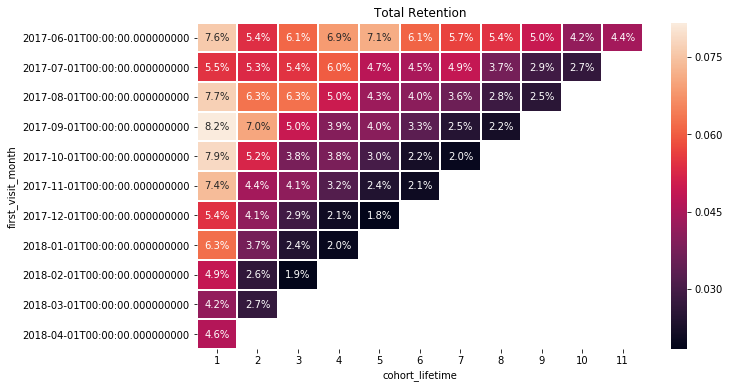

In [62]:
plt.figure(figsize=(10,6))
plt.title('Total Retention')
sns.heatmap(retention_pivot_total, annot=True, fmt='.1%', linewidths=1, linecolor='white')

Здесь также интересно посмотреть на возвращаемость клиентов в зависимости от типа устройства, через которое они заходят на сайт.

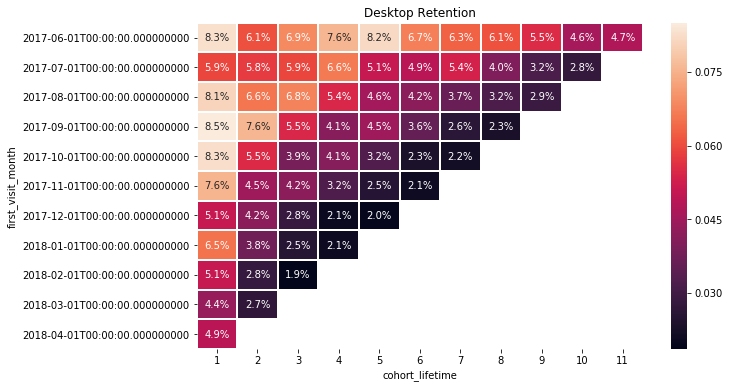

In [63]:
cohorts_desktop = visits.query('device == "desktop"').groupby(['first_visit_month','cohort_lifetime'])['uid'].nunique().reset_index()
initial_users_count_desktop = cohorts_desktop[cohorts_desktop['cohort_lifetime'] == 0][['first_visit_month','uid']]
initial_users_count_desktop = initial_users_count_desktop.rename(columns={'uid':'cohort_users'})
cohorts_desktop = cohorts_desktop.merge(initial_users_count_desktop,on='first_visit_month')
cohorts_desktop['retention'] = cohorts_desktop['uid']/cohorts_desktop['cohort_users']
retention_pivot_desktop = cohorts_desktop.query('cohort_lifetime > 0').pivot_table(index='first_visit_month', columns = 'cohort_lifetime', values='retention',aggfunc='sum')

plt.figure(figsize=(10,6))
plt.title('Desktop Retention')
sns.heatmap(retention_pivot_desktop, annot=True, fmt='.1%', linewidths=1, linecolor='white')

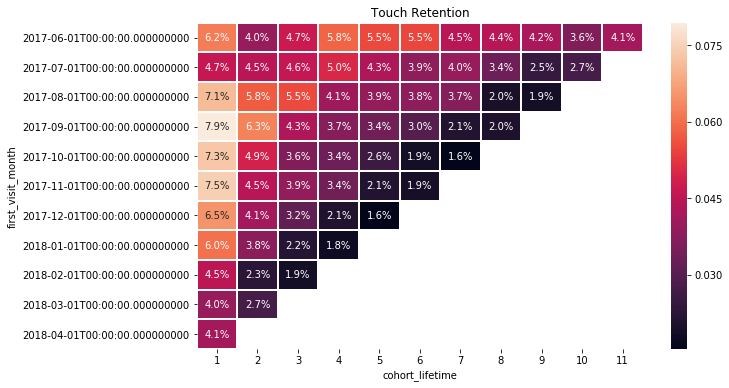

In [64]:
cohorts_touch = visits.query('device == "touch"').groupby(['first_visit_month','cohort_lifetime'])['uid'].nunique().reset_index()
initial_users_count_touch = cohorts_touch[cohorts_touch['cohort_lifetime'] == 0][['first_visit_month','uid']]
initial_users_count_touch = initial_users_count_touch.rename(columns={'uid':'cohort_users'})
cohorts_touch = cohorts_touch.merge(initial_users_count_touch,on='first_visit_month')
cohorts_touch['retention'] = cohorts_touch['uid']/cohorts_touch['cohort_users']
retention_pivot_touch = cohorts_touch.query('cohort_lifetime > 0').pivot_table(index='first_visit_month', columns = 'cohort_lifetime', values='retention',aggfunc='sum')

plt.figure(figsize=(10,6))
plt.title('Touch Retention')
sns.heatmap(retention_pivot_touch, annot=True, fmt='.1%', linewidths=1, linecolor='white')

Видно, что в целом в первый месяц возвращаются от 4,2% до 8,2% посетителей. Причем пришедшие в июне 2017 уходят медленнее: к 11-му месяцу их осталось больше 4%, в то время как те, кто впервые пришел позже, "докатываются" до 2% уже ко 2-4 месяцу.
Видна разница и по возвращаемости людей, в зависимости от используемых ими типов девайсов: "десктопники" возвращаются лучше, имея Retention Rate в первый месяц до 8,3%, а к 11-му месяцу - 4,7%. По пользователям, заходящим на сайт с мобильного устройства, цифры несколько хуже.

Рассматривать Retention Rate в зависимости от источника входа пользователя не имеет смысла, т.к. на "возвращаемость" скорее влияет контент сайта, юзабилити, потребность в предоставляемой услуги как таковой, а не причина/путь, по которому человек на наш сайт пришел.


### Вывод

Мы изучили поведение пользователей на сайте Яндекс.Афиша за период с июня 2017 по май 2018 года.
1. Видна сезонность посещения сайта: летом сайт не очень востребован, а с начала октября и по март посещаемость находится на почти стабильно высоком уровне: примерно от 800 до 1200 посетителей в день.
2. Отмечается 2 заметных аномалии: пик 24 ноября предположительно в день распродаж Черная пятница и падение посещаемости до 0 1 апреля (видимо, по какой-то причине в этот день сайт лег).
3. Примерно 75% ежедневных посещений сайта приходится на десктопную версию, а 25% - на мобильную.
4. Очень неравномерно приходят пользователи из рекламных источников: буквально несколько человек день из источников 6 и 7 и в среднем более 200 человек ежедневно из 3 и 4. Какие при этом затраты идут на каждый источник выясним в исследовании позднее.
5. Средняя сессия на сайте длится более 10 минут: 12 минут с десктопа и 8 минут с мобильного устройства. Однако большинство посетителей сайта проводит на нем менее 8 минут, а на мобильной версии вообще менее 3 минут. Нужно будет разобраться с юзабилити мобильной версии. Возможно, по какой-то причине пользователям меньше нравится изучать сайт на маленьком экране.
6. Возвращаемость клиенов на сайт не слишком высокая: в целом в первый месяц на Яндекс.Афишу возвращаются от 4,2 до 8,2% посетителей (чуть больше через десктопную версию и чуть меньше - через мобильную). Чем позже впервые пришел клиент, тем быстрее он "отваливается" - нужно изучить, почему "старые" клиенты более лояльны к нам. В целом, нужно подумать над контентом: возможно, попробовать сделать акцент не на "уникальных" событиях, за которыми, видимо, приходят текущие пользователи, а делать еженедельные интересные обзоры, подборки к выходным дням и т.д., чтобы побуждать клиентов чаще пользоваться сайтом.


## Раздел 2.2. Продажи  <a name="step2.2"></a>

В данном разделе ответим на следующие вопросы:

- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек покупки?
- Сколько денег приносят сервису? 

<b> Посчитаем, какой период проходит, прежде чем люди из просто посетителей становятся покупателями. </b>

In [65]:
first_buy_date = orders.groupby('uid')['buy_date'].min()
first_buy_date.name = 'first_buy_date'
orders = orders.join(first_buy_date, on='uid')

In [66]:
orders

,buy_ts,revenue,uid,buy_date,buy_week,buy_month,first_buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-31,2018-05-01,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-31,2018-05-01,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-31,2018-05-01,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-31,2018-05-01,2018-05-31


In [67]:
visits_first_date = visits[['uid', 'first_visit_date']]
visits_first_date = visits_first_date.drop_duplicates()

In [68]:
orders = pd.merge(orders, visits_first_date, on='uid', how='left')

In [69]:
orders

,buy_ts,revenue,uid,buy_date,buy_week,buy_month,first_buy_date,first_visit_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2017-10-23


In [70]:
orders['days_to_buy'] = orders['first_buy_date'] - orders['first_visit_date']

In [71]:
orders['days_to_buy'] = orders['days_to_buy'] / np.timedelta64(1,'D')
orders['days_to_buy'] = orders['days_to_buy'].astype(int)

In [72]:
orders

,buy_ts,revenue,uid,buy_date,buy_week,buy_month,first_buy_date,first_visit_date,days_to_buy
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05-31,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05-31,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05-31,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2017-10-23,220


In [73]:
days_to_buy = orders.groupby('uid')['days_to_buy'].mean().reset_index()

In [121]:
days_to_buy

,uid,days_to_buy
0,313578113262317,107
1,1575281904278712,0
2,2429014661409475,0
3,2464366381792757,1
4,2551852515556206,0
...,...,...
36518,18445147675727495770,96
36519,18445407535914413204,0
36520,18445601152732270159,231
36521,18446156210226471712,103


In [74]:
days_to_buy['days_to_buy'].mean()

16.895901212934316

(0, 60)

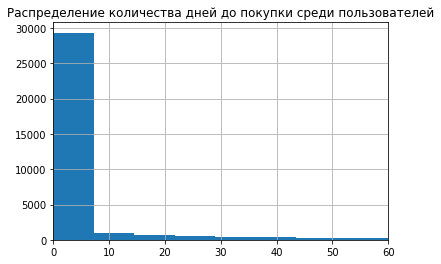

In [132]:
to_buy = days_to_buy['days_to_buy'].hist(bins = 50)
to_buy.set_title('Распределение количества дней до покупки среди пользователей')
to_buy.set_xlim(0, 60)

In [135]:
days_to_buy['days_to_buy'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: days_to_buy, dtype: float64

Получается, что в среднем от момента первого входа на портал и до первой покупки проходит 17 дней. Однако гистограмма показывает, что у абсолютного большинства пользователей (29000 из 36500) это время составляет менее 8 дней. А статистика распределения данных вообще утверждает, что большинство покупателей делали покупки в день первого визита на сайт - это уже больше похоже на правду. Среднее нам "испортили" некоторые люди, у которых ушел почти год до первой покупки - но таких у нас единицы.

<b>Теперь посмотрим, сколько покупок за год совершает наш усредненный пользователь. </b>

In [75]:
orders['uid'].count()/orders['uid'].nunique()

1.3803630588943954

Получается, за целый год каждый пользователь в среднем совершает чуть более 1 покупки. Это очень мало. Нужно придумывать инструменты, как заставить посетителя покупать чаще. Возможно, имеется какие-то трудности с юзабилити: надо проверить, не вызывает ли процесс покупки и оплаты у посетителя отрицательных эмоций.


<b>Вычислим средний чек одной покупки. </b>

In [76]:
orders['revenue'].sum()/orders['uid'].count()

4.999646930477041

Посмотрим также на динамику среднего чека по дням.

In [138]:
revenue_per_buyer_per_day = orders.groupby('buy_date')['revenue'].mean().reset_index()

In [139]:
revenue_per_buyer_per_day

,buy_date,revenue
0,2017-06-01,4.056875
1,2017-06-02,2.919910
2,2017-06-03,2.484776
3,2017-06-04,2.957727
4,2017-06-05,2.742174
...,...,...
359,2018-05-28,3.936170
360,2018-05-29,2.598201
361,2018-05-30,4.911971
362,2018-05-31,7.563803


Text(0, 0.5, 'Средний чек')

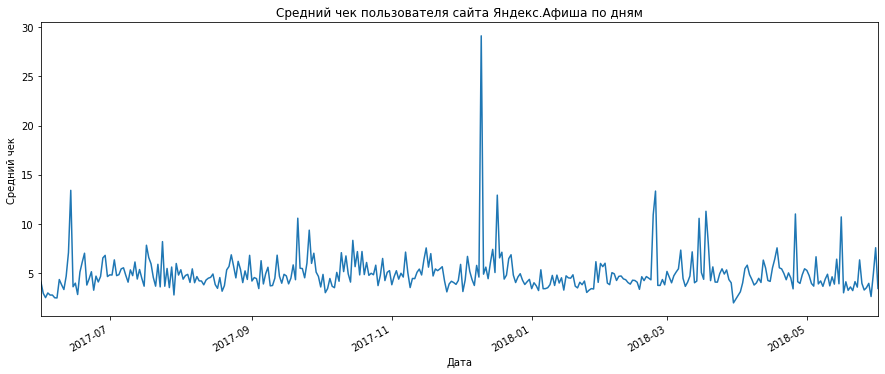

In [145]:
revenue_per_day_plot = revenue_per_buyer_per_day.plot('buy_date', 'revenue',figsize = (15, 6), title='Средний чек пользователя сайта Яндекс.Афиша по дням', legend=False)
revenue_per_day_plot.set_xlabel('Дата')
revenue_per_day_plot.set_ylabel('Средний чек')

В наших данных не представлена информация об общей сумме покупки, мы можем увидеть только доход, который приносит каждый клиент. Получилось, что с одного покупателя Яндекс.Афиша получает 5 (будем надеяться, что хотя бы долларов). Чтобы понять, насколько это плохо или хорошо в дальнейшем посмотрим, сколько стоило привлечение одного покупателя.

В динамике средний чек выглядит очень неравномерно по дням. Пик посещений, обнаруженный ранее в день распродажи Черная пятница, принес Яндекс.Афише и наибольший средний доход: люди покупали со скидками вместо привычного одного билета сразу несколько (примерно 5-6, учитывая что средний чек вырос по сравнению с обычным почти в 6 раз). 
Также видны заметные пики в еще нескольких периодах: середина июня, начало декабря и конец февраля.

<b>Наконец, посчитаем LTV.</b>

In [77]:
orders['first_buy_month'] = orders['first_buy_date'].astype('datetime64[M]')

In [78]:
orders

,buy_ts,revenue,uid,buy_date,buy_week,buy_month,first_buy_date,first_visit_date,days_to_buy,first_buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05-31,0,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05-31,0,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05-31,0,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2017-10-23,220,2018-05-01


In [79]:
cohorts = orders.groupby(['first_buy_month','buy_month']).agg({'revenue': 'sum'}).reset_index()
print(cohorts)

   first_buy_month  buy_month   revenue
0       2017-06-01 2017-06-01   9557.49
1       2017-06-01 2017-07-01    981.82
2       2017-06-01 2017-08-01    885.34
3       2017-06-01 2017-09-01   1931.30
4       2017-06-01 2017-10-01   2068.58
..             ...        ...       ...
74      2018-03-01 2018-05-01   1114.87
75      2018-04-01 2018-04-01  10600.69
76      2018-04-01 2018-05-01   1209.92
77      2018-05-01 2018-05-01  13925.76
78      2018-06-01 2018-06-01      3.42

[79 rows x 3 columns]


In [80]:
first_buy_date_reset = first_buy_date.reset_index()

In [81]:
first_buy_date_reset

,uid,first_buy_date
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24
...,...,...
36518,18445147675727495770,2017-11-24
36519,18445407535914413204,2017-09-22
36520,18445601152732270159,2018-03-26
36521,18446156210226471712,2018-02-18


In [82]:
first_buy_date_reset['first_buy_month'] = first_buy_date_reset['first_buy_date'].astype('datetime64[M]')

In [83]:
first_buy_date_reset

,uid,first_buy_date,first_buy_month
0,313578113262317,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24,2017-11-01
...,...,...,...
36518,18445147675727495770,2017-11-24,2017-11-01
36519,18445407535914413204,2017-09-22,2017-09-01
36520,18445601152732270159,2018-03-26,2018-03-01
36521,18446156210226471712,2018-02-18,2018-02-01


In [84]:
cohort_sizes = first_buy_date_reset.groupby('first_buy_month')['uid'].nunique().reset_index()
cohort_sizes.columns = ['first_buy_month', 'n_buyers']
report = pd.merge(cohort_sizes, cohorts, on='first_buy_month')
report['age'] = (report['buy_month'] - report['first_buy_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['revenue'] / report['n_buyers']
output = report.pivot_table(index='first_buy_month', columns='age', values='ltv', aggfunc='mean').round(2)
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


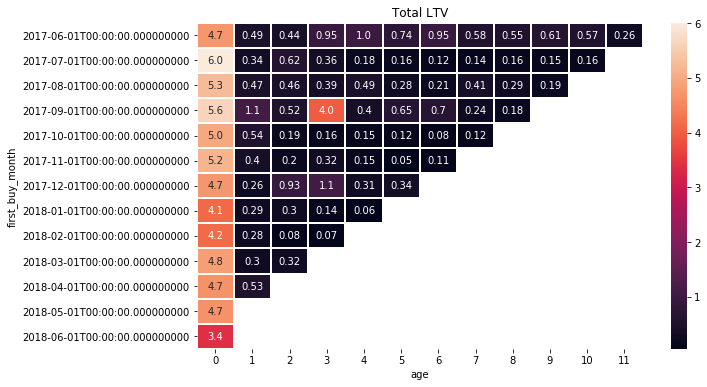

In [85]:
plt.figure(figsize=(10,6))
plt.title('Total LTV')
sns.heatmap(output, annot=True, linewidths=1, fmt='.2', linecolor='white')

In [86]:
output.sum(axis=1)

first_buy_month
2017-06-01    11.88
2017-07-01     8.40
2017-08-01     8.47
2017-09-01    13.43
2017-10-01     6.36
2017-11-01     6.38
2017-12-01     7.65
2018-01-01     4.93
2018-02-01     4.59
2018-03-01     5.46
2018-04-01     5.19
2018-05-01     4.66
2018-06-01     3.42
dtype: float64

In [87]:
output.mean(axis=0)

age
0     4.801538
1     0.456364
2     0.406000
3     0.826667
4     0.345000
5     0.334286
6     0.361667
7     0.298000
8     0.295000
9     0.316667
10    0.365000
11    0.260000
dtype: float64

Пользователи Яндекс.Афиши приносят сервису в первый месяц максимальную сумму денег - от 3,4 до 6,0 долларов. Далее продажи сокращаются в разы. Как мы помним, каждый клиент делает за год чуть более 1 покупки, получается, бОльшая часть этих покупок приходится на первый месяц пользователя. В дальнейшем возвращается очень небольшой процент посетителей, а покупки они совершают еще реже.
Интересно выбивается когорта сентября: в декабре по какой-то причине ее пользователи приносят в среднем по 4 доллара - гораздо больше, чем в любой другой месяц, кроме стартового. Также когорта сентября принесла суммарно уже больше денег, чем когорта июня - нужно будет посмотреть на источники привлечения такого качественного трафика.


### Вывод

Анализ продаж на сервисе Яндекс.Афиши показывает следующее:
1. Медианный пользователь совершает покупку на сайте в тот же день, когда он впервые зашел на сайт - большинтсво пользователей уже имеют сформированную потребность в покупке билета на меропритятие и сразу ее удовлетворяют. 
2. Один клиент за год совершает в среднем чуть больше одной покупки.
3. Каждая покупка в срднем приносит Яндекс.Афише доход, равный 5 долларам.
4. Средний LTV в нулевой период составил 4,8 доллара: большинство посетителей делают свою единственную покупку в свой первый месяц на сайте. Максимальный LTV на текущий период показывает когорта сентября: она имеет непредвиденный рост по покупкам в декабре. После 4-ого месяца клиенты в среднем приносят не более 0,35 долларов в месяц.

По цифрам кажется, что бизнес Яндекс.Афиши не является очень прибыльным, однако, чтобы убедиться в этом или опровергнуть, нужно проанализировать затраты на привлечение клиентов, чем мы и займемся на следкющем этапе.

## Раздел 2.3. Маркетинг  <a name="step2.3"></a>

Изучим следующие вопросы:
- Сколько денег потратила Яндекс.Афиша на привлечение покупателей?
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? 

<b>Посмотрим, как распределялись затраты по времени и по источникам рекламы. </b>

In [88]:
costs.head(5)

,source_id,ad_date,costs,ad_week,ad_month
0,1,2017-06-01,75.20,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-01,2017-06-01
2,1,2017-06-03,36.53,2017-06-01,2017-06-01
3,1,2017-06-04,55.00,2017-06-01,2017-06-01
4,1,2017-06-05,57.08,2017-06-01,2017-06-01


In [89]:
costs['costs'].sum()

329131.62

За все время было потрачено на маркетинг почти 330 000 долларов.

In [90]:
ad_per_month = costs.groupby('ad_month')['costs'].sum().reset_index()
ad_per_month

,ad_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Text(0, 0.5, 'Затраты, долларов')

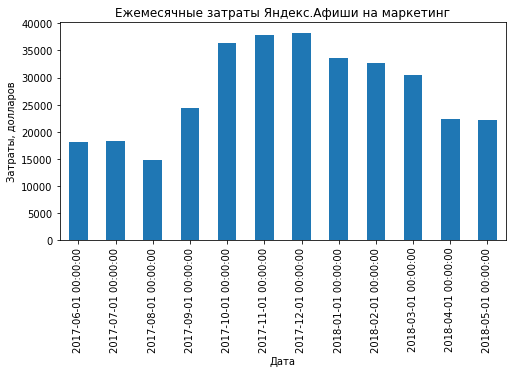

In [91]:
ad_per_month_plot = ad_per_month.plot('ad_month', 'costs', kind='bar', figsize = (8, 4), title='Ежемесячные затраты Яндекс.Афиши на маркетинг', legend=False)
ad_per_month_plot.set_xlabel('Дата')
ad_per_month_plot.set_ylabel('Затраты, долларов')

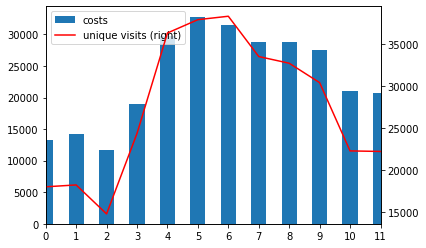

In [92]:
visits_per_month['uid'].plot(kind='bar', label='costs', legend=True)
ad_per_month['costs'].plot(secondary_y=True, color='r', label='unique visits', legend=True)

Как видно из совмещенного графика, динамика прихода уникальных посетителей практически полностью совпадает с затратами на продвижение - в целом, это хороший тренд, значит, с большой вероятностью, мы тратили деньги на правильные рекламные источники.
Посмотрим на затраты по рекламным источникам

In [93]:
ad_per_source = costs.groupby('source_id')['costs'].sum().reset_index()

In [94]:
ad_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Text(0, 0.5, 'Затраты, долларов')

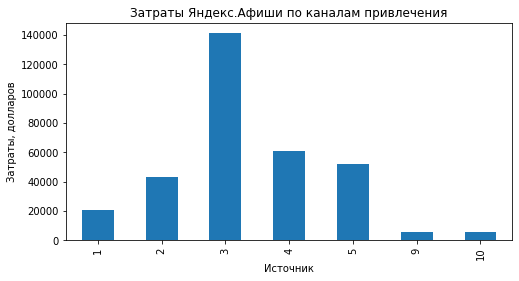

In [95]:
ad_per_source_plot = ad_per_source.plot('source_id', 'costs', kind='bar', figsize = (8, 4), title='Затраты Яндекс.Афиши по каналам привлечения', legend=False)
ad_per_source_plot.set_xlabel('Источник')
ad_per_source_plot.set_ylabel('Затраты, долларов')

Получается, платных источников на самом деле было не 10, а 7, и каналы 6 и 7, которые привели нам меньше всего пользователей, были для нас бесплатными. Канал 8 отсутствует в обоих отчетах.

Самым дорогим каналом стал 3 - хотя больше пользователей нам принес канал 4.

<b>Посчитаем, сколько стоило привлечение одного покупателя из каждого источника.</b>

In [96]:
visits_source = visits[['uid', 'source_id']]
visits_source = visits_source.drop_duplicates()

In [97]:
visits_source['uid'].nunique()

228169

In [98]:
visits_source.count()

uid          277870
source_id    277870
dtype: int64

Получается, у почти 50 тыс. клиентов были разные источники входа. Упростим расчеты, предположив, что на покупку в большой степени повлиял первый реламный источник, с которого был осуществлен вход.

In [99]:
visits_source = visits_source.drop_duplicates(subset = 'uid').reset_index()

In [100]:
visits_source

,index,uid,source_id
0,0,16879256277535980062,4
1,1,104060357244891740,2
2,2,7459035603376831527,5
3,3,16174680259334210214,9
4,4,9969694820036681168,3
...,...,...,...
228164,358517,12734910664455613822,10
228165,358522,6761309174945977743,4
228166,358525,11102751930812818282,3
228167,358527,272012551460639309,4


In [101]:
orders_with_sources = pd.merge(orders, visits_source, on='uid', how='left')

In [102]:
orders_with_sources

,buy_ts,revenue,uid,buy_date,buy_week,buy_month,first_buy_date,first_visit_date,days_to_buy,first_buy_month,index,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,11727,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,69744,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,190436,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,352873,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,263040,3
...,...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05-31,0,2018-05-01,43215,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05-31,0,2018-05-01,129697,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05-31,0,2018-05-01,139217,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2017-10-23,220,2018-05-01,121449,4


In [103]:
orders_per_source = orders_with_sources.groupby('source_id').agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
orders_per_source

,source_id,revenue,uid
0,1,38560.06,3743
1,2,65152.26,4323
2,3,44317.68,9138
3,4,52479.75,9823
4,5,40357.91,6839
5,7,1.22,1
6,9,7076.98,1415
7,10,4111.34,1241


In [104]:
ad_per_source = pd.merge(ad_per_source, orders_per_source, on='source_id')

In [105]:
ad_per_source

,source_id,costs,revenue,uid
0,1,20833.27,38560.06,3743
1,2,42806.04,65152.26,4323
2,3,141321.63,44317.68,9138
3,4,61073.60,52479.75,9823
4,5,51757.10,40357.91,6839
5,9,5517.49,7076.98,1415
6,10,5822.49,4111.34,1241


In [106]:
ad_per_source['cost_per_buyer'] = ad_per_source['costs']/ad_per_source['uid']

In [107]:
ad_per_source

,source_id,costs,revenue,uid,cost_per_buyer
0,1,20833.27,38560.06,3743,5.565928
1,2,42806.04,65152.26,4323,9.901929
2,3,141321.63,44317.68,9138,15.465269
3,4,61073.60,52479.75,9823,6.217408
4,5,51757.10,40357.91,6839,7.567934
5,9,5517.49,7076.98,1415,3.899286
6,10,5822.49,4111.34,1241,4.691773


Text(0, 0.5, 'Затраты, долларов')

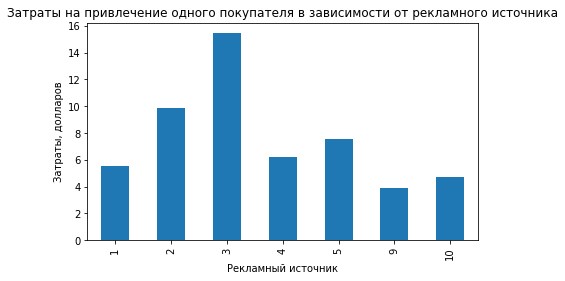

In [108]:
cost_per_buyer_plot = ad_per_source.plot(x='source_id', y='cost_per_buyer', figsize = (7, 4), kind='bar', title='Затраты на привлечение одного покупателя в зависимости от рекламного источника', legend=False)
cost_per_buyer_plot.set_xlabel('Рекламный источник')
cost_per_buyer_plot.set_ylabel('Затраты, долларов')

Дороже всего нам обошелся покупатель, пришедший из канала 3 - почти 16 долларов. При среднем чеке одной покупки в 5 долларов и среднем количестве покупок за год 1,3 раза это кажется очень много. 
Самым "дешевым" для нас оказались покупатели из источников 9 и 10, но, как мы помним, посетителей, пришедших из данных источников в принципе было почти меньше всех.


<b>Теперь посмотрим, насколько окупились расходы.</b>

Сделаем это двумя способами: 

1) через расчет отношения полученного дохода к расходам в зависимости от источника привлечения покупателя и

2) через расчет отношения LTV к CAC по когортам.

In [109]:
ad_per_source['revenue_to_costs'] = ad_per_source['revenue']/ad_per_source['costs']

In [110]:
ad_per_source

,source_id,costs,revenue,uid,cost_per_buyer,revenue_to_costs
0,1,20833.27,38560.06,3743,5.565928,1.850889
1,2,42806.04,65152.26,4323,9.901929,1.522034
2,3,141321.63,44317.68,9138,15.465269,0.313594
3,4,61073.60,52479.75,9823,6.217408,0.859287
4,5,51757.10,40357.91,6839,7.567934,0.779756
5,9,5517.49,7076.98,1415,3.899286,1.282645
6,10,5822.49,4111.34,1241,4.691773,0.706114


Text(0, 0.5, 'Доход на затраты')

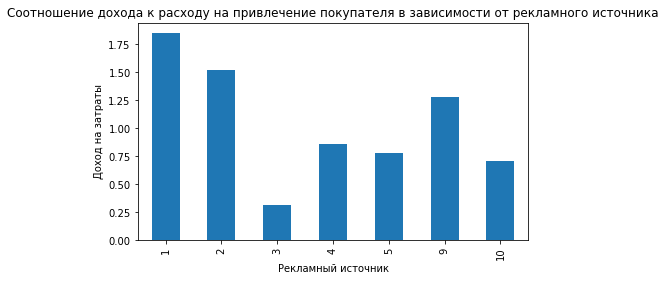

In [111]:
revenue_to_costs_plot = ad_per_source.plot(x='source_id', y='revenue_to_costs', figsize = (7, 4), kind='bar', title='Соотношение дохода к расходу на привлечение покупателя в зависимости от рекламного источника', legend=False)
revenue_to_costs_plot.set_xlabel('Рекламный источник')
revenue_to_costs_plot.set_ylabel('Доход на затраты')

In [112]:
ad_per_source['revenue_to_costs'].mean()

1.0449026824849168

Видим, что затраты не из всех источников окупились: самым выгодным с точки зрения привлечения покупателей оказался источник 1. Также среди успешных оказались источники 2 и 9 (отношение дохода к расходам больше 1).

А вот источник 3, на который было потрачено больше всего, принес в 4 раза меньше денег, чем было затрачено на него.

Средняя окупаемость по всем источникам за период положительная - чуть больше 1, но не факт, что она будет такой же, если мы будем считать окупаемость по когортам.

Теперь посчитаем ROI (или в нашем случае, скорее ROMI): соотношение LTV, рассмотренного ранее, и CAC.

In [113]:
monthly_costs = costs.groupby('ad_month')['costs'].sum().reset_index()

In [114]:
monthly_costs

,ad_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [115]:
report_new = pd.merge(report, monthly_costs, left_on='first_buy_month', right_on='ad_month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['roi'] = report_new['ltv'] / report_new['cac']
report_new.head() 

,first_buy_month,n_buyers,buy_month,revenue,age,ltv,ad_month,costs,cac,roi
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,18015.0,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,2017-06-01,18015.0,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,2017-06-01,18015.0,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,2017-06-01,18015.0,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,2017-06-01,18015.0,8.905091,0.114825


In [116]:
output = report_new.pivot_table(index='first_buy_month', columns='age', values='roi', aggfunc='mean')
output = output.cumsum(axis=1).round(2)
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


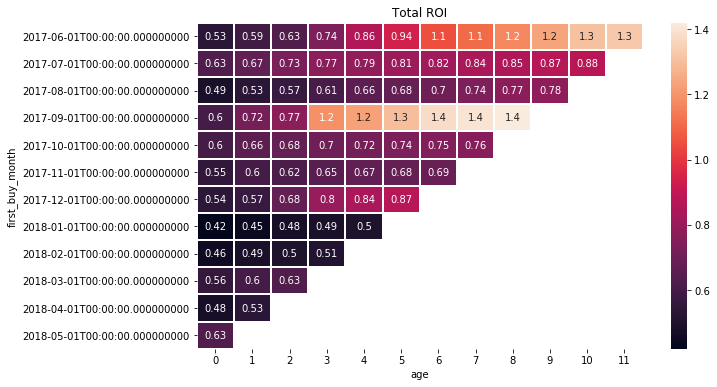

In [117]:
plt.figure(figsize=(10,6))
plt.title('Total ROI')
sns.heatmap(output, annot=True, linewidths=1, fmt='.2', linecolor='white')

Всплеск LTV, который наблюдался у когорты сентября, повторился и на графике ROI: если январская когорта вышла на положительную доходность к 6-му месяцу, то сентябрьская - уже к 4-му.

In [118]:
output.mean(axis=0)

age
0     0.540833
1     0.582727
2     0.629000
3     0.717778
4     0.783750
5     0.860000
6     0.898333
7     0.970000
8     1.052500
9     0.963333
10    1.095000
11    1.330000
dtype: float64

Получается, каждая когорта окупается в промежутке между 8 и 10 месяцем - довольно длительный срок.


### Вывод

По анализу маркетинговых расходов Яндекс.Афиши можно сделать следующие выводы.
1. За все время на маркетинг было потрачено почти 330 000 долларов, причем рост или снижение затрат вызывал пропорциональное изменение в привлеченном числе посетителей во времени.
2. Затраты на различные рекламные источники были неравномерны и имели разную окупаемость. Так, источники 1,2 и 9 принесли больше дохода, чем на них было потрачено, а вот источник 3 оказался самым "дорогим" по соотношению дохода к затратам.
3. Тот эже источник 3 привел к нам и самого "дорогого" покупателя - по стоимости почти 16 долларов. При среднем чеке одной покупки в 5 долларов и среднем количестве покупок за год чуть более 1 раза - непростительная роскошь.
4. ROI в нулевой период в среднем составил 0,54 - т.е. почти половина расходов, потраченных на привлечение клиентов, не окупается. К 8-10 месяцу ROI выходит на положительную величину, значит, перспективы есть и бизнес Яндекс.Афиши является прибыльным.

# Общий вывод <a name="step3"></a>

Проведенный анализ посещений, продаж и рекламных расходов сайта Яндекс.Афиша показывает, что в целом бизнес является прибыльным, несмотря на очень скромные показатели Retention Rate, среднее время до первой покупки, равное 14 дням и среднее число покупок одного человека в год, равное 1,3.

Большинство посетителей сайта посещали его десктопную версию (почти 75%), здесь же наблюдается и чуть больший Retention Rate, однако, нельзя игнорировать факт, что в целом на рынке наблюдается тенденция к переходу на мобильные телефоны, поэтому пускать все деньги в рекламу на десктоп не стоит. Я бы обозначила распределение рекламных расходов десктоп/мобильные устройства на уровне примерно 60/40 с потеницалом к росту пользователей именно с этого девайса.

При этом, помимо рекламных расходов, необходимо обратить внимание и на контент сайта и на юзабилити: просто повышение рекламных расходов не сможем помочь нам в удержании клиента и в стимулировании к покупке - это будет просто потеря бюджета.

Что касается рекламных источников, интереснее всего вкладываться в источники 1, 2 и 9 - те, которые окупились. Основной бюджет можно пустить в источник 1 - он был самым дешевым с точки зрения привлечения покупателя - чуть более 5 долларов при такой же сумме одной средней покупки. Он же и больше всех окупился - в 1,75 раз. Остальные источники из текущих лучших исключить, но попробовать поискать новые - чтобы охват аудитории был шире и появилось больше потенциальный покупателей. 
